In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import re

In [3]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 1000)

In [155]:
df=pd.read_csv('database/extra/data_clean_29Apr.csv')

In [42]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [43]:
df.shape

(91669, 58)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91669 entries, 0 to 91668
Data columns (total 58 columns):
idx               91669 non-null int64
_No               91669 non-null int64
Month             91669 non-null int64
Time              91669 non-null object
Place_refer       91669 non-null object
State             91669 non-null object
Radial            91669 non-null float64
Distance          91669 non-null float64
AGL               91669 non-null object
MSL               91669 non-null object
MCondition        91669 non-null object
Visibility        91669 non-null object
Light             91669 non-null object
Ceiling           91669 non-null object
AC1_ATC           91669 non-null object
AC1_Operator      91669 non-null object
AC1_Model         91669 non-null object
AC1_Crew          91669 non-null object
AC1_Rule          91669 non-null object
AC1_FP            91669 non-null object
AC1_Mission       91669 non-null object
AC1_Nav           91669 non-null object
AC1_Phase   

In [151]:
df['Month']=pd.to_datetime(df['Month'], format='%Y%m')

In [152]:
df.set_index(['idx','Month'],drop=False)

idx      _No      Month       Time    Place_refer State  Radial  Distance     AGL      MSL MCondition                                     Visibility     Light  Ceiling                               AC1_ATC AC1_Operator                                               AC1_Model   AC1_Crew   AC1_Rule AC1_FP      AC1_Mission                                          AC1_Nav                                               AC1_Phase                                          AC1_Route                                 AC1_Airspace  AC1_Seats  AC1_Passengers                AC2_ATC   AC2_Operator                                          AC2_Model   AC2_Crew   AC2_Rule AC2_FP      AC2_Mission     AC2_Nav                                             AC2_Phase                               AC2_Route              AC2_Airspace  AC2_Seats  AC2_Passengers               P1_Loc                    P1_Org                                        P1_Func                                                                                                                                                     P1_Qual                                                                                                                                                                                                   P1_Experience                                                                                                    P1_HumaFactor               P2_Loc                    P2_Org                                         P2_Func                                                                                                                                  P2_Qual                                                                                                       P2_Experience  \
idx    Month                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1      1988-01-01       1    79912 1988-01-01  1201-1800       SEA; BFI    WA     0.0       6.0    None    900.0        VMC                                           None  Daylight     None                 TRACON SEA; Tower BFI     Personal             Small Aircraft; Low Wing; 1 Eng; Fixed Gear          1       None    VFR         Personal                                             None                           Climb; Takeoff; Initial Climb 

In [47]:
df.index.names

FrozenList([None])

In [199]:
column_names=['Time','Place_refer','State','Radial','Distance','Altitude','MCondition','Visibility','Light',
                 'Ceiling','AC1_ATC','AC1_Operator','AC1_Model','AC1_Crew','AC1_Rule','AC1_FP','AC1_Mission','AC1_Nav',
                 'AC1_Phase','AC1_Route','AC1_Airspace','AC1_Seats','AC1_Passengers','AC2_ATC','AC2_Operator','AC2_Model',
                  'AC2_Crew','AC2_Rule','AC2_FP','AC2_Mission','AC2_Nav','AC2_Phase','AC2_Route','AC2_Airspace','AC2_Seats',
                  'AC2_Passengers','P1_Loc','P1_Org','P1_Func','P1_Qual','P1_Experience','P1_HumaFactor','P2_Loc','P2_Org',
                  'P2_Func','P2_Qual','P2_Experience','Anomaly','Detector','Result','Other_Factors','Pri_Problem','Narrative',
                  'Synopsis']

In [200]:
val_count={}

In [201]:
for col_n in column_names:
    c=df[col_n].value_counts()
    val_count[col_n]=c

In [202]:
val_count['Time']

1201-1800    36590
0601-1200    27642
1801-2400    19212
0001-0600     4746
None          3466
ZZZ             13
Name: Time, dtype: int64

In [203]:
val_count['Light']

Daylight    60109
Night       13849
None        12125
Dusk         4115
Dawn         1471
Name: Light, dtype: int64

In [204]:
df[df.Light=='None'][df.Time=='None'].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1788, 57)

In [205]:
df[df.Light!='None'][df.Time!='None'].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(77866, 57)

In [210]:
df[df.Light=='None'][df.Time=='1201-1800'].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(3457, 57)

In [219]:
for idx,row in df.iterrows():
    if df.Light[idx]=='None' and df.Time[idx]=='ZZZ':
        df.Time[idx]='None'
    elif df.Time[idx]=='None' and df.Light[idx]=='Daylight' :
        df.Time[idx]='0601-1200'
    elif df.Time[idx]=='None' and df.Light[idx]=='Night' :
        df.Time[idx]='0001-0600'
    elif (df.Time[idx]=='1201-1800' or df.Time[idx]=='0601-1200') and df.Light[idx]=='None' :
        df.Light[idx]='Daylight'
    elif (df.Time[idx]=='1801-2400' or df.Time[idx]=='0001-0600') and df.Light[idx]=='None' :
        df.Light[idx]='Night'
    elif df.Time[idx]=='ZZZ' and df.Light[idx]=='Daylight' :
        df.Time[idx]='0601-1200'
    elif df.Time[idx]=='ZZZ' and df.Light[idx]=='Night' :
        df.Time[idx]='0001-0600'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [230]:
light_val_count=df.Light.value_counts()
light_val_count

Daylight    65948
Night       18342
Dusk         4115
None         1793
Dawn         1471
Name: Light, dtype: int64

In [229]:
time_val_count=df.Time.value_counts()
time_val_count

1201-1800    36590
0601-1200    28929
1801-2400    19212
0001-0600     5042
None          1896
Name: Time, dtype: int64

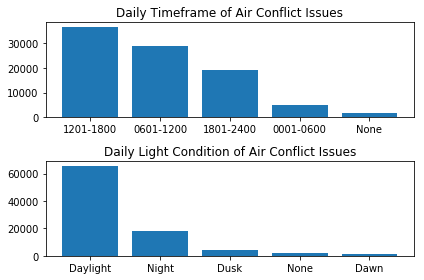

In [241]:
plt.subplot(2,1,1)
plt.bar(time_val_count.index, time_val_count.values)
plt.title('Daily Timeframe of Air Conflict Issues')
plt.tight_layout()
plt.subplot(2,1,2)
plt.bar(light_val_count.index, light_val_count.values)
plt.title('Daily Light Condition of Air Conflict Issues')
plt.tight_layout()

In [117]:
empty_time=['None','ZZZ']
for item in empty_time:
    for index,row in df.iterrows():
        if df.Time[index]==item:
            if df.Light[index]=='Daylight':
                df.Time[index]=='0601-1200'
            elif df.Light[index]=='Night':
                df.Time[index]=='0001-0600'

In [118]:
df.Time.value_counts()

1201-1800    36590
0601-1200    27642
1801-2400    19212
0001-0600     4746
None          3466
ZZZ             13
Name: Time, dtype: int64

In [119]:
val_count['Light']

Daylight    60109
Night       13849
None        12125
Dusk         4115
Dawn         1471
Name: Light, dtype: int64

In [153]:
df.AGL=pd.to_numeric(df.AGL,errors='coerce')
df.MSL=pd.to_numeric(df.MSL,errors='coerce')

In [162]:
df[df.AGL=='None']['MSL'].value_counts().sort_index()

0             7
0.0         190
0.3           1
10.0          1
100           2
100.0        46
1000         27
1000.0     1299
10000        64
10000.0    2374
10001.0       1
1002.0        1
1003.0        1
1007.0        1
1009.0        3
101.0         1
1010.0        2
10100.0      13
1015.0        1
1020.0        4
10200         3
10200.0      44
10220.0       1
1026.0        4
10270.0       1
1030.0        1
10300         1
10300.0      57
1035.0        1
10350.0       1
1040.0        1
10400.0      39
10450.0       1
1050          1
1050.0       11
10500         9
10500.0     304
10560.0       1
10590.0       1
10600.0      90
10650.0       6
10660.0       1
10680.0       1
107.0         1
10700         1
10700.0      79
10725.0       2
10750         1
10750.0       7
1080.0        1
10800.0      45
10900.0       8
1095.0        1
110.0         2
1100          7
1100.0      248
11000        38
11000.0    1737
11005.0       1
1106.0        1
11100.0       7
1117.0        1
1120    

In [163]:
df[df.MSL=='None']['AGL'].value_counts().sort_index()

0            216
0.0        15233
1.0            4
10             1
10.0          29
100            2
100.0        337
1000           7
1000.0       821
10000.0       15
1040.0         1
1048.0         1
10500.0        1
1067.0         1
10800.0        1
109.0          2
110.0          2
1100.0        40
11000.0        6
11400.0        1
1150.0         2
120.0          3
1200           1
1200.0       110
12000.0        6
122.0          1
123.0          2
125.0          2
1250.0         1
126.0          1
1280.0         1
130.0          1
1300.0        42
13000.0        4
13500.0        1
1381.0         1
1385.0         1
1400.0        19
14000.0        1
144.0          1
1446.0         1
1450.0         1
15             1
15.0           7
150.0         96
1500           3
1500.0       287
15000.0       10
1550.0         2
15500.0        1
160.0          1
1600.0        12
16000.0        3
1650.0         2
1700.0        15
17000.0        4
175.0          2
17500.0        2
180.0         

In [164]:
df[df.MSL=='None'].shape

(27810, 58)

In [166]:
df[df.AGL=='None'].shape

(69971, 58)

In [170]:
69971+27810-6237

91544

In [169]:
df.shape

(91669, 58)

In [174]:
df[df.AGL=='None'][df.MSL=='None'].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(6237, 58)

In [175]:
df[df.AGL!='None'][df.MSL!='None'].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(125, 58)

In [177]:
df[df.AGL!='None'][df.MSL!='None'][['AGL','MSL']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


AGL      MSL
46        0.0   6000.0
886     700.0   1600.0
1808    700.0   1200.0
3601      0.0   6500.0
5284   1100.0   7600.0
6106      0.0    889.0
13630     0.0  11500.0
14656  1250.0      1.0
15652     0.0      1.0
19716     0.0      0.0
20124     0.0   3000.0
21306   500.0      0.0
22057     0.0      0.0
23728  5000.0   5722.0
23798   500.0   5500.0
24451   630.0   1800.0
24494     0.0      0.0
25921  1100.0   1500.0
26204     0.0      0.0
26276     0.0   1000.0
26342     0.0   7000.0
26494   300.0   4500.0
26681  5000.0   8500.0
33880     0.0   3000.0
41573     8.0   3000.0
42199    40.0  13300.0
42867    40.0  11000.0
43666   500.0   5500.0
44179     0.0   1000.0
44679     0.0   3500.0
44683   500.0   8500.0
44858    47.0  17500.0
45329   200.0   2000.0
45785   800.0   1200.0
45796     0.0   3000.0
46925     0.0  16000.0
47067     0.0  11000.0
47082   787.0    800.0
47248     0.0  17000.0
47384     0.0   3000.0
47504     0.0   5200.0
47541   500.0   1700.0
47635     0.0   1800.0
47712   800.0  18000.0
47744     0.0    800.0
47847     0.0    400.0
47867     0.0   1000.0
48166    30.0  24000.0
48256   500.0   1400.0
48270     0.0   4000.0
48314     0.0   1000.0
48474     0.0   4800.0
48848    40.0  27700.0
48850     0.0      0.0
48904    40.0   5000.0
49059     0.0   2000.0
49276     0.0   4000.0
49286     0.0   1500.0
49381     0.0   2700.0
49486     0.0   1500.0
49527     0.0   5000.0
49537     0.0   3000.0
49583     0.0   3000.0
49767     0.0   9223.0
49905     0.0   3500.0
50025     0.0   2100.0
50090     0.0  10000.0
50471     0.0   1600.0
50477  1000.0   7200.0
50568   225.0  12000.0
50615     0.0   3500.0
51190     0.0   7000.0
51214   360.0  33000.0
51569  1200.0   6500.0
51593     0.0   5500.0
51915     0.0   1500.0
52832     0.0      700
52910     0.0     5800
54022     0.0     2100
54023    12.0    12000
55094    70.0  29000.0
55439   250.0   2000.0
55498    12.0   2500.0
55527     3.0   2000.0
55586   500.0   5500.0
55610     0.0   2000.0
56242     6.0   3000.0
56421     0.0   1400.0
56501     0.0  13000.0
56511     7.0   3000.0
57137     7.0   3200.0
57437  1000.0  10400.0
57579     6.0   4000.0
57971     7.7   1500.0
58391  1173.0   6000.0
58430  1000.0      7.0
62050     0.0      0.0
62992     0.0  41000.0
63087     0.0   3900.0
63153     0.0  17000.0
63317     6.0   4000.0
63523     0.0   3000.0
63555   500.0   3500.0
63924     0.0  15000.0
65158     0.0   2000.0
65182   100.0    200.0
65215    10.0   2500.0
65491   250.0   8000.0
65758     5.0   6500.0
65800    13.0   5000.0
65906     6.0   2000.0
65983    40.0  12000.0
67039     2.0   1500.0
67955       0   5000.0
68148       6   3000.0
68203       0   5000.0
68719    50.0    100.0
69107   300.0   1500.0
69548     0.0  34000.0
69614     0.0   2500.0
69884     0.0   5500.0
70723     0.0   8000.0
70962     0.0  10000.0
71116     4.0   1500.0
71493    10.0  10000.0

In [185]:
df['Altitude']=0
for index,row in df.iterrows():
    if df.AGL[index]=='None' and df.MSL[index]=='None':
        df['Altitude'][index]=0
    elif df.AGL[index]=='None':
        df['Altitude'][index]=df.MSL[index]
    elif df.MSL[index]=='None':
        df['Altitude'][index]=df.AGL[index]
    else:
        df['Altitude'][index]=max(df.MSL[index],df.AGL[index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 


KeyboardInterrupt: 

In [191]:
df.Altitude=pd.to_numeric(df.Altitude,errors='coerce')

In [355]:
df.Altitude.value_counts().sort_values().head(10)

28670.0    1
760.0      1
344.0      1
1941.0     1
359.0      1
375.0      1
29200.0    1
1015.0     1
8625.0     1
266.0      1
Name: Altitude, dtype: int64

In [194]:
df.shape

(91669, 59)

In [196]:
df=df.drop(columns=['AGL','MSL'])

In [197]:
df.shape

(91669, 57)

(array([9.209e+03, 9.595e+03, 4.585e+03, 4.117e+03, 2.590e+03, 2.815e+03,
        3.037e+03, 2.974e+03, 1.360e+03, 8.560e+02, 1.196e+03, 4.840e+02,
        8.020e+02, 3.890e+02, 8.980e+02, 1.110e+03, 4.440e+02, 1.149e+03,
        8.950e+02, 1.164e+03, 2.980e+02, 1.177e+03, 1.000e+03, 5.540e+02,
        2.990e+02, 4.400e+01, 1.100e+02, 2.100e+01, 2.000e+01, 1.000e+00]),
 array([1.00000000e+01, 1.57633333e+03, 3.14266667e+03, 4.70900000e+03,
        6.27533333e+03, 7.84166667e+03, 9.40800000e+03, 1.09743333e+04,
        1.25406667e+04, 1.41070000e+04, 1.56733333e+04, 1.72396667e+04,
        1.88060000e+04, 2.03723333e+04, 2.19386667e+04, 2.35050000e+04,
        2.50713333e+04, 2.66376667e+04, 2.82040000e+04, 2.97703333e+04,
        3.13366667e+04, 3.29030000e+04, 3.44693333e+04, 3.60356667e+04,
        3.76020000e+04, 3.91683333e+04, 4.07346667e+04, 4.23010000e+04,
        4.38673333e+04, 4.54336667e+04, 4.70000000e+04]),
 <a list of 30 Patch objects>)

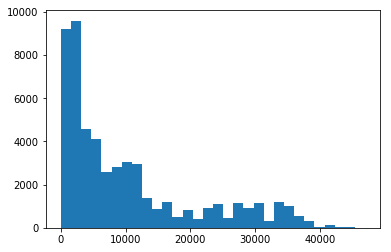

In [198]:
plt.hist(df.Altitude,bins=30,range=(10,47000))

In [246]:
val_count['State']

CA            11854
US             7889
TX             5783
FL             5400
NY             4211
FO             3726
IL             3502
NJ             3036
PA             2764
VA             2582
OH             2523
CO             2505
GA             2492
AZ             2102
NC             1892
MI             1819
WA             1816
NV             1631
TN             1528
IN             1512
MD             1391
MO             1237
MA             1102
UT             1082
DC             1064
MN             1033
AK             1027
None            954
OR              807
KY              783
NM              768
WI              729
HI              656
KS              620
SC              606
WV              545
CT              530
LA              520
AL              500
OK              459
NH              410
AR              392
PR              364
IA              354
NE              338
MS              304
ON              283
ID              270
DE              259
MT              243


In [248]:
df.State=df.State.str.upper()

In [254]:
df[df.State=='US.AIRPORT']['State']

40984    US.AIRPORT
Name: State, dtype: object

In [257]:
df.loc[40984, 'State']='US'

In [350]:
df.State.value_counts().sort_index()

AB         68
AK       1027
AL        500
AR        392
AS          1
AZ       2102
BC         77
CA      11855
CO       2505
CT        530
DC       1064
DE        259
FL       5400
FO       3726
GA       2492
GU         37
HI        656
IA        354
ID        270
IL       3502
IN       1513
KS        620
KY        783
LA        520
MA       1102
MB         13
MD       1391
ME        160
MI       1819
MN       1033
MO       1237
MS        304
MT        243
NB         15
NC       1892
ND        154
NE        338
NF        128
NH        410
NJ       3036
NM        768
NS         13
NT          3
NV       1631
NY       4211
None     8845
OH       2523
OK        459
ON        283
OR        807
PA       2764
PR        364
QC         64
RI        242
SC        606
SD        140
SK          5
TN       1528
TX       5786
UT       1082
VA       2582
VI         36
VT         94
WA       1816
WI        729
WV        545
WY        215
YT          1
Name: State, dtype: int64

In [310]:
PQ=df[df.State=='PQ']

In [313]:
PQ.shape

(62, 57)

In [317]:
for index,values in PQ.iterrows():
    df.loc[index,'State']='QC'

In [320]:
df[df.State=='FO']['Place_refer'].head(50)

5            MDSD
97            FPO
367           ROR
410           CUN
537           PJM
558           NAS
596          MMMX
611           NAS
666          LPLA
743           ZFP
915           SDQ
952           LHR
981           NAS
1131          ATH
1208          ZQA
1245     BUN; BRU
1316          PTA
1340    CDO; MDSD
1366          HCN
1414          ZBV
1453          QPR
1486          KAE
1559          GSO
1563          TPA
1607          NRT
1628    JFK; EGPK
1658          MIL
1662    FKO; LSZH
1763          SEL
1805          DAN
1822           NM
1894          HKG
2107          RMS
2125          GDL
2135          BDA
2136          BDA
2198          STU
2249         EGCC
2273          CVC
2284         RPMK
2310          MBJ
2313          MNL
2336         MSLT
2405          BDA
2420          AGU
2462          KEF
2499          CDO
2548          BDA
2573          BDA
2710     CDG; LTN
Name: Place_refer, dtype: object

In [343]:
df[df.State=='US']['Place_refer'].value_counts().head(10)

ZZZ.Airport     6108
ZZZ.ARTCC        697
ZZZ              423
ZZZ.TRACON       343
ZZZ.Tower         97
None              57
ZZZ.VOR           25
ZZZ.VORTAC        23
ZZZ1.Airport      17
ZZZ; ZZZ           6
Name: Place_refer, dtype: int64

In [346]:
df[df.State=='NONE']['Place_refer'].value_counts().head(10)

None           749
ORD.Airport      6
ZZZ              5
DFW.Airport      5
ZZZ.Airport      5
DCA.Airport      4
SLC.Airport      4
CLT.Airport      3
SJC.VOR          2
ZFW.ARTCC        2
Name: Place_refer, dtype: int64

In [347]:
US_=df[df.State=='US']
non=df[df.State=='NONE']

In [349]:
for idx,row in US_.iterrows():
    df.loc[idx,'State']='None'
for idx,row in non.iterrows():
    df.loc[idx,'State']='None'

In [351]:
df.shape

(91670, 57)

In [352]:
df.to_csv('database/extra/data_clean_8May.csv')